# **DECISION TREE**

## 1. Introdução

Uma árvore de decisão é (Decision Tree) um algoritmo de aprendizagem supervisionada não paramétrico, utilizado para tarefas de classificação e regressão. Possui uma estrutura hierárquica em árvore, que consiste num nó raiz, ramos, nós internos e nós folha.
Fonte: https://www.ibm.com/topics/decision-trees

<img src="assets\Decision-Tree.png" alt="Decision-Tree" style="display: block; margin: auto; width: 500px;"/>

## 1.1. Objectivo

Treinar um modelo atraves do algoritmo (Decision Tree) para prever uma variável de destino com base nos demais atributos do conjunto de dados. Neste caso, o objetivo é treinar o modelo para prever a probabilidade de um edifício apresentar uma reivindicação de seguro durante o período de cobertura.

## 1.2. Informação dos dados

Trata-se de registros de inspeções realizadas em edifícios na Nigéria, onde coletamos dados sobre estruturas que sofreram danos por diversos motivos. Para mais detalhes, recomendo consultar o notebook <a href="data_cleaning.ipynb">Link de Limpeza de Dados</a>, ou visitar a plataforma da Zindi, de onde os dados foram extraídos.

## 2. Importar dados e Bibliotecas

- Certifique-se de que as bibliotecas necessárias estão instaladas para garantir o correto funcionamento do código.
- Caso ainda não tenha as bibliotecas instaladas, utilize a célula abaixo para instalar.

Caso não tenha as bibliotecas instaladas, remova o comentário `#` da célula abaixo e execute para instalar:

In [6]:
# !pip install pandas seaborn matplotlib scikit-learn

In [8]:
import pandas as pd #para leitura de dados
import seaborn as sns #para viauslizar dados
import matplotlib.pyplot as plt #para imprimir graficos
from sklearn.metrics import confusion_matrix #para mostrar a confusão do modelo
from sklearn.preprocessing import StandardScaler, LabelEncoder #para pré-processar os dados
from sklearn.model_selection import train_test_split #funcao para dividir os dados
from sklearn.tree import DecisionTreeClassifier #o algoritmo
from sklearn.tree import plot_tree #para mostrra a árvore geranda
import matplotlib.pyplot as plt #para imprimir figuras ou gráficos
from sklearn.metrics import accuracy_score, classification_report #para medir o desempenho

In [10]:
# carregar dados já limpos
data = pd.read_csv('https://raw.githubusercontent.com/DSAI-For-Moz/guia-pratico-machine-learning/main/datasets/aprendizagem-supervisionada/data_cleaned.csv')

# mostrar um resumo do que temos nos dados
data.head()


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,4,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,4,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,4,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


## 3. Normalizar os dados

Converter dados categóricos, quando necessário, em valores numéricos pode ser realizado utilizando técnicas como one-hot encoding ou label encoding, uma vez que os algoritmos de machine learning, por natureza, não processam textos, mas sim valores numéricos, como 0 e 1. Esse tipo de transformação é essencial para que os modelos consigam interpretar e processar adequadamente as informações categóricas.

_________________________________________________________

Vantagens e Desvantagens:

1. One-hot encoding (conversão para múltiplas colunas binárias)<br>
    Vantagem - Garante que o modelo interprete corretamente categorias que não possuem uma relação de ordem. <br>
    Desvantagem - Pode gerar um aumento significativo no número de colunas, especialmente em casos com muitas categorias.


2. Label encoding (atribuição de valores inteiros)<br>
    Vantagem - Mantém o número de colunas inalterado ou pequeno. <br>
    Desvantagem: Pode induzir uma ordem artificial entre as categorias, o que nem sempre é desejável.


_________________________________________________________

Colunas como **Building_Painted, Building_Fenced, Garden, Settlement**, que são categóricas e representadas por strings como "V", "N", precisam ser convertidas para valores numéricos a fim de serem utilizadas de forma eficiente no modelo.

In [ ]:
# Converta variáveis ​​categóricas usando a codificação de rótulos
label_encoder = LabelEncoder()
categorical_columns = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Geo_Code']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Estandardizar colunas numéricas usando o StandardScaler
scaler = StandardScaler()
numerical_columns = ['Building Dimension', 'YearOfObservation', 'Insured_Period', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows', 'Claim']  #numerical columns

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

## 4. Divisão

- Variáveis preditoras (X): Todas as colunas exceto a variável alvo.
- Variável alvo (y): A variável que você deseja prever (o "target"). No nosso caso é o Residential.

In [ ]:
# os recursos (X) e o destino (y)
X = data.drop(columns=['Residential'])  # Features (drop the target column)
y = data['Residential']  # Target variable

Dividimos o dataset em conjuntos de treino (para ajustar o modelo) e conjuntos de teste (para avaliar o desempenho do modelo).
- Geralmente, uma divisão de 80/20 ou 70/30 é utilizada.

In [ ]:
# Divida os dados em conjuntos de treino e teste (80% de treino, 20% de teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Treino

In [ ]:
# Inicializar e treinar o modelo de árvore de decisão
decision_tree_model = DecisionTreeClassifier()

#treinando o modelo
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

## 6. Analise dos resultados

In [ ]:
# Faça previsões e avalie o modelo
y_pred = decision_tree_model.predict(X_test)

#  Calculando accuracias
accuracy = accuracy_score(y_test, y_pred)

# calculando outrs metricas
classification_rep = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy}\n")
print(f"Relatório de classificação: \n{classification_rep}")

Acurácia: 0.7848699763593381

Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1466
           1       0.65      0.66      0.65       649

    accuracy                           0.78      2115
   macro avg       0.75      0.75      0.75      2115
weighted avg       0.79      0.78      0.79      2115



0.7815 ou cerca de 78%. <br>
A acurácia mede a porcentagem de previsões corretas em relação ao total de instâncias. Neste caso, o modelo fez previsões corretas em 78% dos casos, combinando as duas classes (0 e 1).

Este relatório inclui métricas como precisão (precision), revocação (recall) e f1-score para cada classe (0 e 1), além de uma métrica geral.
<br><br>
- A precisão é importante quando o foco é evitar falsos positivos.
<br><br>
- A revocação é útil para avaliar o quanto o modelo consegue capturar todos os verdadeiros positivos, sendo relevante quando queremos minimizar falsos negativos.
<br><br>
- O f1-score é a média harmônica entre a precisão e a revocação. Um bom equilíbrio entre essas duas métricas, especialmente útil quando temos classes desbalanceadas, como parece ser o caso aqui (1466 para classe 0, 649 para classe 1).

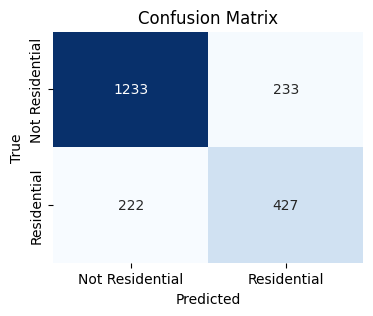

In [ ]:
# Gerando a matrix de confisão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimindo a matrix de confusoa
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Residential', 'Residential'],
            yticklabels=['Not Residential', 'Residential'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A diagonal principal da matriz de confusão representa os acertos (previsões corretas), enquanto os elementos fora da diagonal principal (a "diagonal secundária") representam os erros (falsos positivos e falsos negativos).<br><br>

Interpretação: <br>
- O modelo previu corretamente 1231 casos como 0 e 422 casos como 1.
- Houve 227 erros onde o modelo previu incorretamente 0 quando o verdadeiro valor era 1 (falsos negativos).
- Houve 235 erros onde o modelo previu 1 quando o verdadeiro valor era 0 (falsos positivos).

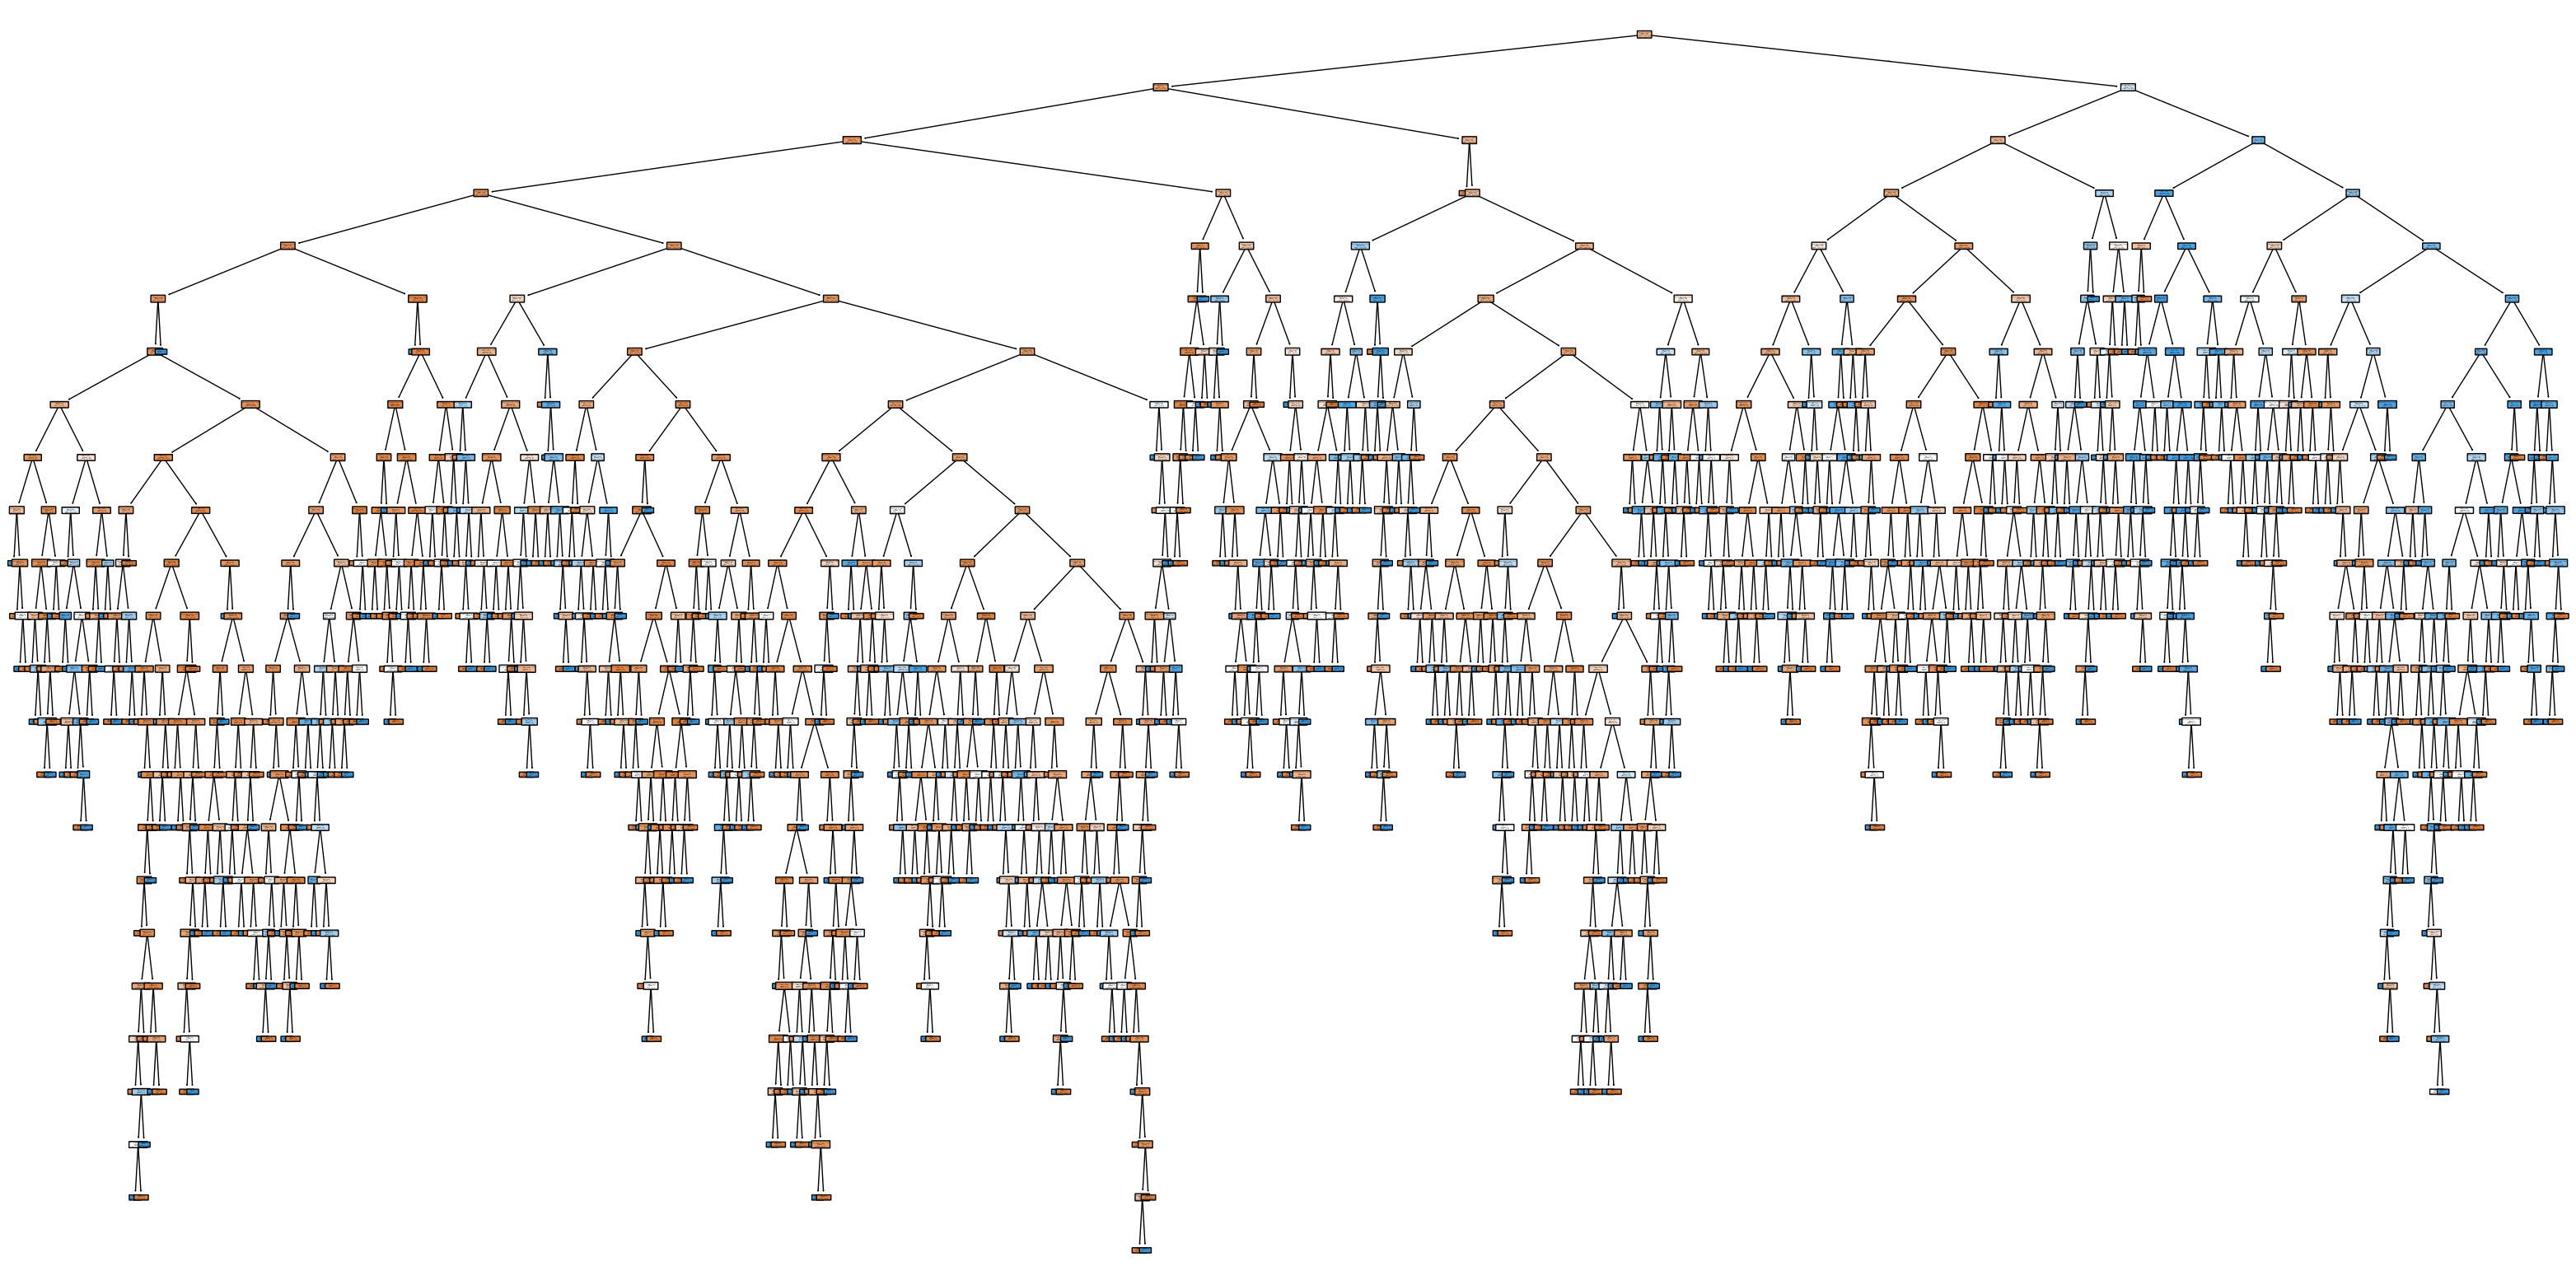

In [ ]:
# Ajustar o tamanho da figura
plt.figure(figsize=(40,20))

# Plotar a árvore de decisão treinada
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['Non-Residential', 'Residential'], filled=True, rounded=True)

# Mostrar o gráfico
plt.show()


- A árvore de decisão divide os dados em subconjuntos em cada nó com base em um critério de divisão.
- Cada nó da árvore contém uma condição de divisão que tenta separar os dados em duas ou mais classes.

_______________________________________

*"Em algum lugar, algo incrível está esperando para ser descoberto."* - Carl Sagan

TEM MAIS 🚀🚀

Ver mais: <a herf="data_cleaning.ipynb">Data Cleaning</a> <br>
Ver mais: <a herf="decision_tree.ipynb">Supporte Vector Machine</a>

by Do Rosário, Euclides